In [1]:
#Import libraries
import os
import pandas as pd
import requests
import matplotlib.pyplot as plt
import numpy as np
from datetime import date
import matplotlib.ticker as ticker

In [2]:
# API Key from EIA
api_key = 'XXXXXXX'
# api_key = os.getenv("EIA_API_KEY")

# State Names to Label Columns
# Assign column labels
STATE_NAMES = ['GA','SC','NC','FL','US']
# Enter all your Series IDs off EIA.com
STATE_KEY = ['ELEC.SALES.GA-RES.M',
'ELEC.SALES.SC-RES.M',
'ELEC.SALES.NC-RES.M',
'ELEC.SALES.FL-RES.M',
'ELEC.SALES.US-RES.M']

# Initialize list - this is the final list that will store
# all the data from the json pull. List is for concat into a pandas dataframe. 
final_data = []
# Choose start and end dates
startDate = '2009-01-01'
endDate = '2023-01-01'

In [4]:
# Pull in data via EIA API
for i in range(len(STATE_KEY)):
    url = 'https://api.eia.gov/series/?api_key=' + api_key + '&series_id=' + STATE_KEY[i]
    r = requests.get(url)
    json_data = r.json()
    
    if r.status_code == 200:
        print('Success!')
    else:
        print('Error')
        print(json_data)
    
    df = pd.DataFrame(json_data.get('series')[0].get('data'),
                      columns = ['Date', STATE_NAMES[i]])
    df.set_index('Date', drop=True, inplace=True)
    final_data.append(df)

Success!
Success!
Success!
Success!
Success!


In [5]:
# Sanity Check
# Use these 3 codes to see what Json Data is being produced
# print(json_data)
json_data.get('series')
#print(json_data.get('series'))

[{'series_id': 'ELEC.SALES.US-RES.M',
  'name': 'Retail sales of electricity : United States : residential : monthly',
  'units': 'million kilowatthours',
  'f': 'M',
  'description': 'Electricity sold to residential customers; Electricity sold to residential customers; ',
  'copyright': 'None',
  'source': 'EIA, U.S. Energy Information Administration',
  'iso3166': 'USA',
  'geography': 'USA',
  'start': '200101',
  'end': '202201',
  'updated': '2022-03-24T12:57:46-0400',
  'data': [['202201', 140593.60425],
   ['202112', 118084.63095],
   ['202111', 101030.15028],
   ['202110', 104580.8024],
   ['202109', 131863.863],
   ['202108', 158651.32152],
   ['202107', 155325.12257],
   ['202106', 132833.60027],
   ['202105', 101498.3153],
   ['202104', 94177.11665],
   ['202103', 114426.39382],
   ['202102', 126969.9203],
   ['202101', 137127.39003],
   ['202012', 129760.75834],
   ['202011', 99660.93654],
   ['202010', 105513.9361],
   ['202009', 127823.89319],
   ['202008', 158939.14743],

In [7]:
# Combine all the data into one dataframe
electricity = pd.concat(final_data, axis=1)

In [8]:
# Create date as datetype datatype
#electricity['Year'] = electricity.index.astype(str).str[:4]
#electricity['Month'] = electricity.index.astype(str).str[4:]
#electricity['Day'] = electricity['Date'] = pd.to_datetime(crude[['Year','Month','Day']])
#electricity.set_index('Date',drop=True,inplace=True)
#electricity.sort_index(inplace=True)
#electricity = electricity[startDate:endDate]
#electricity = electricity.iloc[:,:5]

In [9]:
# df.head()

NameError: name 'padd' is not defined

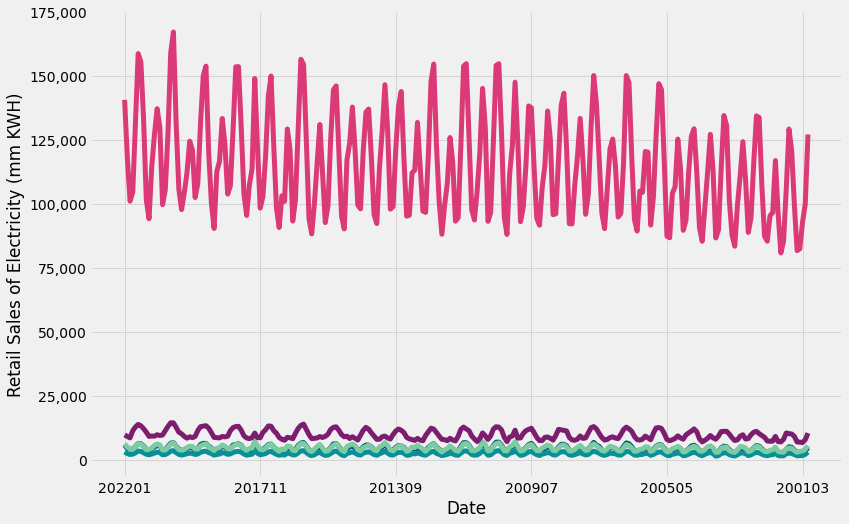

In [10]:
# Generating Colors and Style
colors = {'GA':'#045275', 
          'SC':'#089099', 
          'NC':'#7CCBA2', 
          'FL':'#7C1D6F', 
          'US':'#DC3977'}
plt.style.use('fivethirtyeight')
# Creating the Visualization
plot = electricity.plot(figsize=(12,8), 
                  color=list(colors.values()), 
                  linewidth=5, 
                  legend=False)
plot.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
plot.grid(color='#d4d4d4')
plot.set_xlabel('Date')
plot.set_ylabel('Retail Sales of Electricity (mm KWH)')
# Assigning Color
for state in list(colors.keys()):
    plot.text(x = electricity.index[-1], y = electricity[state].max(), color = 
    colors[padd], s = state, weight = 'bold')
# Adding Labels
plot.text(x = electricity.index[1], 
          y = int(electricity.max().max())+1300, 
          s = "electricity Usage by State (Million Kilowatt Hours)", 
          fontsize = 23, 
          weight = 'bold', 
          alpha = .75)
plot.text(x = electricity.index[1], 
          y = int(electricity.max().max())+900, 
          s = "Electricity Usage by State is a proxy for electricity demand per state", 
          fontsize = 16, 
          alpha = .75)
plot.text(x = electricity.index[1], 
          y = -1000,
          s = 'Source: Energy Information Administration www.eia.gov', 
          fontsize = 10)